# CoCo Fits
___

## ./lcfit Visual inspection

In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# reload(pcc) ## FOR DEV
# reload(pcc.defaults)
# reload(pcc.functions)

In [ ]:
plot_out_dir = "/Users/berto/plots/CoCo-pycoco-debugging/"

sn_to_check = ["SN1993J",
"SN1994I",
"SN1996cb",
"SN1998bw",
"SN1999dn",
"SN2002ap",
"SN2003jd",
"SN2004aw",
"SN2005bf",
"SN2005hg",
"SN2006aj",
"SN2007C",
"SN2007Y",
"SN2007uy",
"SN2007gr",
"SN2008D",
"SN2008bo",
"SN2008ax",
"SN2009bb",
"SN2009er",
"SN2009iz",
"SN2009jf",
"SN2010al",
"SN2010as",
"SN2011bm",
"SN2011dh",
"SN2011ei",
"SN2011fu",
"SN2012ap",
"SN2013ge",
"iPTF13bvn"]

# sn_to_check = ["SN1998bw",]
# sn_to_check = ["SN2006aj",]
# sn_to_check = ["SN2007uy",]
# sn_to_check = ["SN2011dh",]
# sn_to_check = ["SN1994I",]
# sn_to_check = ["SN2002ap",]
# sn_to_check = ["SN2009jf",]
# sn_to_check = ["SN2015U",]


for snname in sn_to_check:
    sn = pcc.classes.SNClass(snname)
    sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
    try:
        sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))
    except:
        pass
    sn.load_spec()
    sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
    sn.check_overlaps()
    print(sn.name)
#     sn.plot_lc()    
#     sn.plot_lc(xextent=60, savepdf=False, outpath=os.path.join(plot_out_dir, snname+"karpenka10"), showsnname=True)
    sn.plot_lc(xextent=60, savepdf=False, outpath=os.path.join(plot_out_dir, snname+"_bazin09"), showsnname=True)
#     sn.plot_lc(xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_bazin09"), showsnname=True)
#     sn.plot_lc(["SDSS_g"], xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_kessler10"), showsnname=True, multiplot=False)

In [ ]:
pcc.utils.get_max_info(sn, "BessellB")

In [ ]:
plt.scatter(sn.phot.data["BessellB"]["MJD"], sn.phot.data["BessellB"]["flux"] - sn.lcfit.spline["BessellB"](sn.phot.data["BessellB"]["MJD"]))

In [ ]:
sn = pcc.classes.SNClass("SN2008D")
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/SN2008D.dat"))
sn.plot_lc()

In [ ]:
sn = pcc.classes.SNClass("SN2006aj")
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path,"lc/SN2006aj.dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, "SN2006aj.list"))
sn.load_spec()
# sn.check_overlaps()

In [ ]:
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, "SN2006aj.dat"))
sn.plot_lc()

In [ ]:
sn.plot_spec()

In [ ]:
sn.load_mangledspec()
sn.plot_mangledspec()

In [ ]:
# snname = "SN1993J" ## POOR FIT IN B
# snname = "SN1994I" ## data/spec/SN1994I/1994I_6.69.txt is too short
# snname = "SN1996cb"## Good - best example of uncertainties
# snname = "SN1998bw"
# snname = "SN1999dn"## Poor fit in B - unconstrained rise
# snname = "SN2002ap"## Poor fit post-max in B
# snname = "SN2003jd"
# snname = "SN2004aw"## Poor fit in B - unconstrained rise
# snname = "SN2005bf"## Weirdo - not bad fit, but not great
snname = "SN2005hg"## Poor I-spectra
# snname = "SN2006aj"## Good even with bump in R
# snname = "SN2007C" ## Good - Sparse phot pre max
# snname = "SN2007Y"
# snname = "SN2007uy"## Perfect!
# snname = "SN2007gr"## Poor fit to B-band post-peak
# snname = "SN2008D" ## Early bump drives fit - poor around peak
# snname = "SN2008bo"
# snname = "SN2008ax"## Poor fit around peak
# snname = "SN2009bb"
# snname = "SN2009er"## poor fit - NO PRE-MAX BESSELLB
# snname = "SN2009iz"
# snname = "SN2009jf"
# snname = "SN2010al" 
# snname = "SN2010as"## NEED LIST FILE AND SPEC CALIBRATED
# snname = "SN2011bm"
# snname = "SN2011dh"## poor fit around peak
# snname = "SN2011ei"## B blows up
# snname = "SN2011fu" ## Huge pre-max burst missed in all bands, phot uncertainties too small
# snname = "SN2012ap"
# snname = "SN2013ge"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
# sn.load_spec()
sn.check_overlaps()
print(sn.name)

In [ ]:
sn.get_lcfit("/Users/berto/Code/CoCo/recon/" + snname + ".dat")
sn.plot_lc(xextent=60)

In [ ]:
# sn.plot_spec()

In [ ]:
# sn.load_mangledspec(verbose = True)

In [ ]:
# sn.plot_mangledspec()

In [ ]:
# for s in sn._mangledspeclist:
#     print(s)

In [ ]:
# sn.mangledspec["SN1994I_49457.990000.spec"].plot()

In [ ]:
# specobj.data.meta['comments']

In [ ]:
reload(pcc.classes)

In [2]:
snname = "SN2011dh"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec(verbose = True)

SN2011dh
loading mangledspec
0 SN2011dh_55715.030000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55715.030000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55715.030000.spec
['data/spec/SN2011dh/2011dh_-17.67.txt']
[0] 1
1 SN2011dh_55716.030000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55716.030000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55716.030000.spec
['data/spec/SN2011dh/2011dh_-16.67.txt']
[1] 1
2 SN2011dh_55717.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55717.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55717.020000.spec
['data/spec/SN2011dh/2011dh_-15.68.txt']
[2] 1
3 SN2011dh_55718.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55718.020000.spec


/Users/berto/Code/verbose-enigma/pycoco/classes.py:216: UserWarning: WARNING: You passed something that was <class 'numpy.str_'>This might go wrong.
  errors.StringWarning(filename)


Reading /Users/berto/Code/CoCo/recon/SN2011dh_55718.020000.spec
['data/spec/SN2011dh/2011dh_-14.68.txt']
[3] 1
4 SN2011dh_55719.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55719.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55719.020000.spec
['data/spec/SN2011dh/2011dh_-13.68.txt']
[4] 1
5 SN2011dh_55720.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55720.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55720.020000.spec
['data/spec/SN2011dh/2011dh_-12.68.txt']
[5] 1
6 SN2011dh_55721.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55721.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55721.020000.spec
['data/spec/SN2011dh/2011dh_-11.68.txt']
[] 0
7 SN2011dh_55722.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55722.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55722.020000.spec
['data/spec/SN2011dh/2011dh_-10.68.txt']
[6] 1
8 SN2011dh_55724.010000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55724.010000.spec
Reading /Users/berto/

In [3]:
sn.mangledspec

OrderedDict([('SN2011dh_55715.030000.spec',
              <pycoco.classes.specfitClass at 0x10f3a5da0>),
             ('SN2011dh_55716.030000.spec',
              <pycoco.classes.specfitClass at 0x10efa56d8>),
             ('SN2011dh_55717.020000.spec',
              <pycoco.classes.specfitClass at 0x10fc2b080>),
             ('SN2011dh_55718.020000.spec',
              <pycoco.classes.specfitClass at 0x10f3b37b8>),
             ('SN2011dh_55719.020000.spec',
              <pycoco.classes.specfitClass at 0x10f3f94a8>),
             ('SN2011dh_55720.020000.spec',
              <pycoco.classes.specfitClass at 0x10f7e0a20>),
             ('SN2011dh_55721.020000.spec',
              <pycoco.classes.specfitClass at 0x10f3b8a58>),
             ('SN2011dh_55722.020000.spec',
              <pycoco.classes.specfitClass at 0x10f3b3cc0>),
             ('SN2011dh_55724.010000.spec',
              <pycoco.classes.specfitClass at 0x10f4bc240>),
             ('SN2011dh_55729.010000.spec',
           

<IPython.core.display.Javascript object>


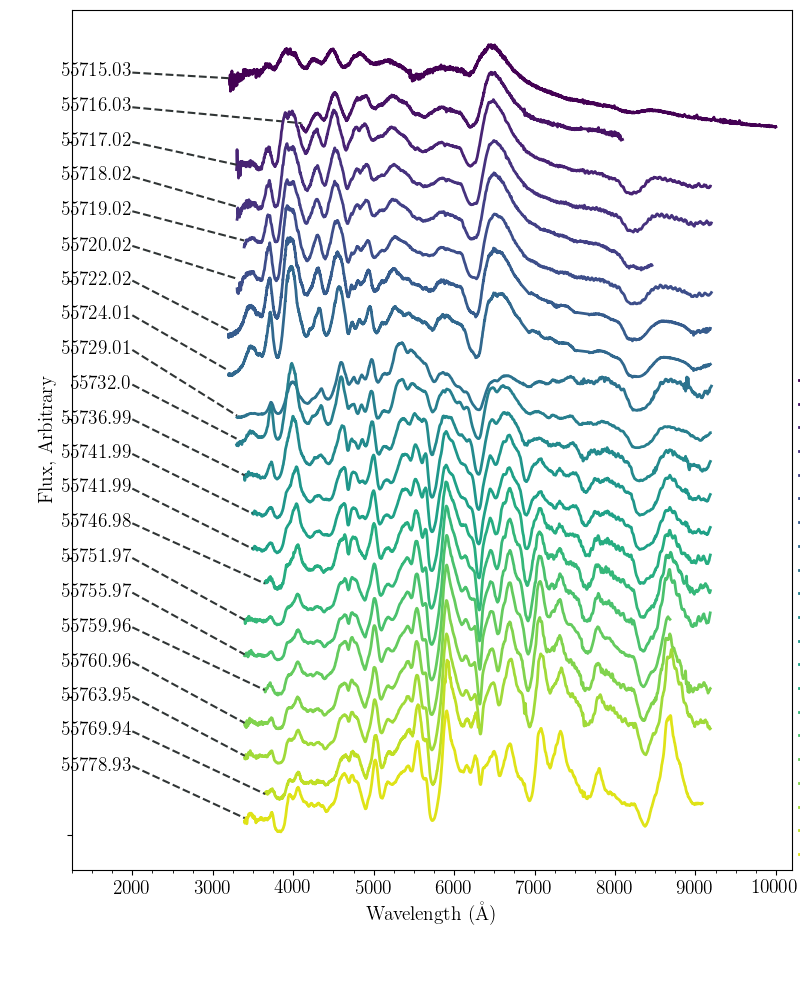

22
0 100 SN2011dh_55715.030000.spec 3396 3396 3396
3396 Foo
0.91844582312
1 73 SN2011dh_55716.030000.spec 1459 1459 1459
1459 Foo
0.270338889186
2 66 SN2011dh_55717.020000.spec 1966 1966 1966
1966 Foo
-0.328878577994
3 66 SN2011dh_55718.020000.spec 1966 1966 1966
1966 Foo
-0.933920413425
4 40 SN2011dh_55719.020000.spec 1015 1015 1015
1015 Foo
-1.42191752913
5 67 SN2011dh_55720.020000.spec 1965 1965 1965
1965 Foo
-1.97307118061
7 233 SN2011dh_55722.020000.spec 6965 6965 6965
6965 Foo
-2.71627339173
8 232 SN2011dh_55724.010000.spec 6965 6965 6965
6965 Foo
-3.29806538105
9 67 SN2011dh_55729.010000.spec 1966 1966 1966
1966 Foo
-3.94647401414
10 67 SN2011dh_55732.000000.spec 1967 1967 1967
1967 Foo
-4.27906366861
11 67 SN2011dh_55736.990000.spec 1937 1937 1937
1937 Foo
-4.80748399694
12 67 SN2011dh_55740.990000.spec 1902 1902 1902
1902 Foo
-5.36009999561
13 67 SN2011dh_55741.990000.spec 1902 1902 1902
1902 Foo
-5.86708805043
14 67 SN2011dh_55746.980000.spec 1851 1851 1851
1851 Foo
-6.368657

In [4]:
sn.plot_mangledspec(verbose=True)

In [ ]:
sn.mangledspec['SN2011dh_55778.930000.spec'].set_MJD_obs(

In [ ]:
snname = "SN2009er"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec()

In [ ]:
sn.plot_mangledspec()

In [ ]:

# filenamedat = "/Users/berto/data/DES/des_real_01250017_smp_data.dat"
